In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

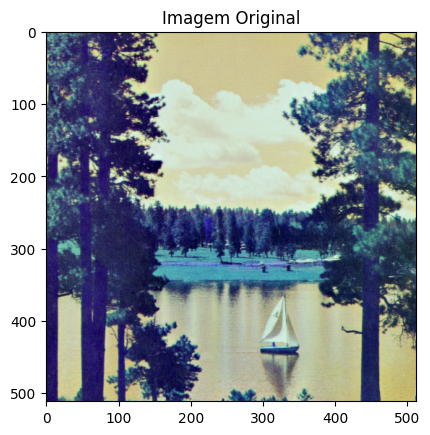

In [2]:
image = cv2.imread('imgs/4.2.06.tiff')

plt.imshow(image)
plt.title('Imagem Original')
plt.show()

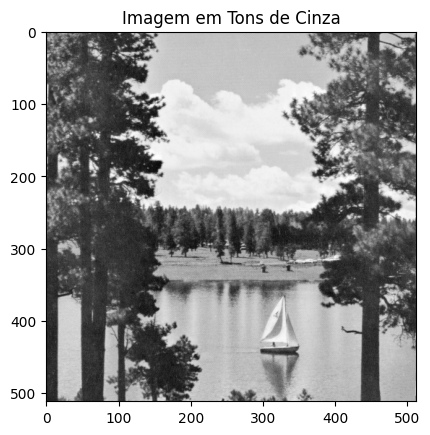

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray, cmap='gray')
plt.title('Imagem em Tons de Cinza')
plt.show()

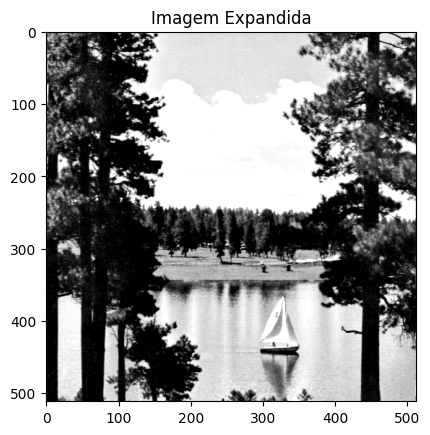

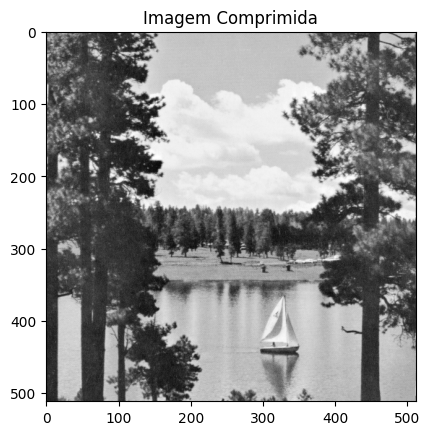

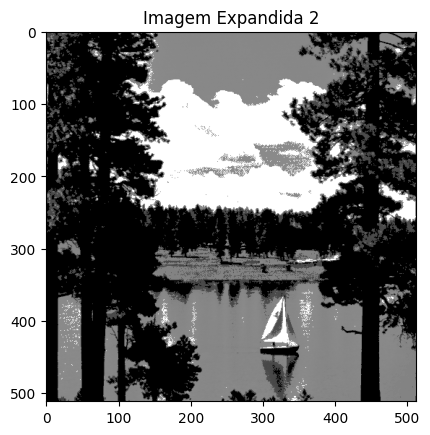

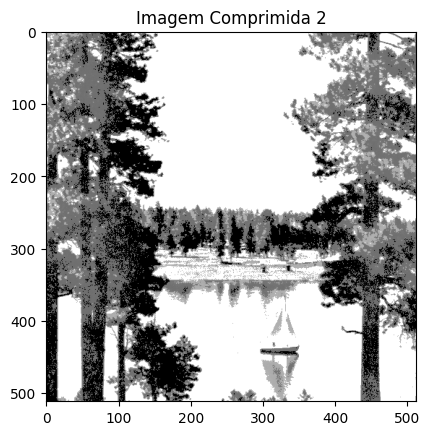

In [4]:
r1 = 50
r2 = 200

expantion = np.zeros((image.shape[0],image.shape[1]), dtype="uint8")
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        new_color = 255*( (gray[i,j] - r1) / (r2 - r1))
        # ensure the new color is between 0 and 255
        new_color = max(0,min(new_color,255))
            
        expantion[i,j] = new_color


expantion = np.array(expantion)

compresion = np.zeros((image.shape[0],image.shape[1]), dtype="uint8" )
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        compresion[i,j] = r1 + (r2 - r1) * (gray[i,j] / 255)

compresion = np.array(compresion)

r1 = 100
r2 = 150
r3 = 200

s1 = 50
s2 = 100
s3 = 150

expantion2 = np.zeros((image.shape[0],image.shape[1]), dtype="uint8")
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        if gray[i,j] <= r1:
            expantion2[i,j] = 0
        elif gray[i,j] > r1 and gray[i,j] <= r2:
            expantion2[i,j] = s1 + (s2 - s1) * (gray[i,j] / 255)
        elif gray[i,j] > r2 and gray[i,j] <= r3:
            expantion2[i,j] = s2 + (s3 - s2) * (gray[i,j] / 255)
        else:
            expantion2[i,j] = 255

expantion2 = np.array(expantion2)

compresion2 = np.zeros((image.shape[0],image.shape[1]), dtype="uint8")

for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        if gray[i,j] <= s1:
            compresion2[i,j] = 0
        elif gray[i,j] > s1 and gray[i,j] <= s2:
            compresion2[i,j] = r1 + (r2 - r1) * (gray[i,j] / 255)
        elif gray[i,j] > s2 and gray[i,j] <= s3:
            compresion2[i,j] = r2 + (r3 - r2) * (gray[i,j] / 255)
        else:
            compresion2[i,j] = 255

compresion2 = np.array(compresion2)

plt.imshow(expantion, cmap='gray')
plt.title('Imagem Expandida')
plt.show()

plt.imshow(compresion, cmap='gray')
plt.title('Imagem Comprimida')
plt.show()

plt.imshow(expantion2, cmap='gray')
plt.title('Imagem Expandida 2')
plt.show()

plt.imshow(compresion2, cmap='gray')
plt.title('Imagem Comprimida 2')
plt.show()

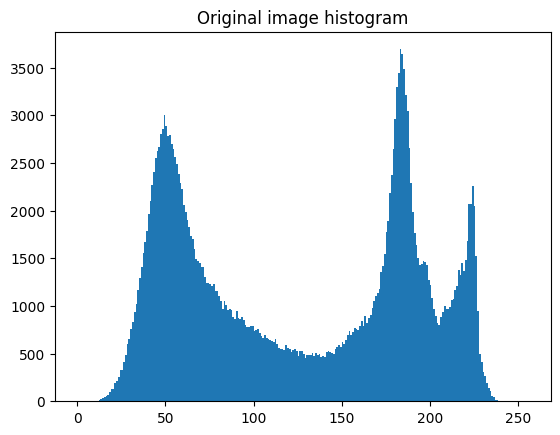

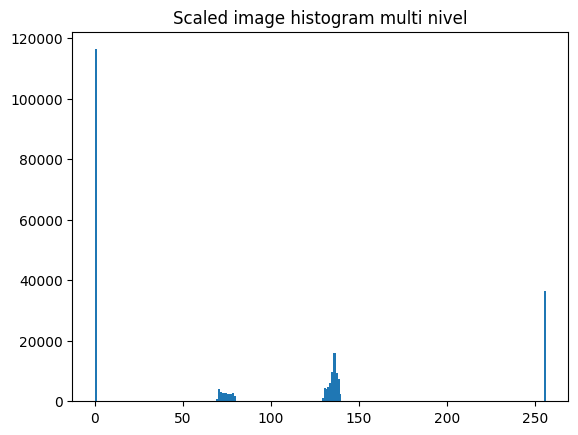

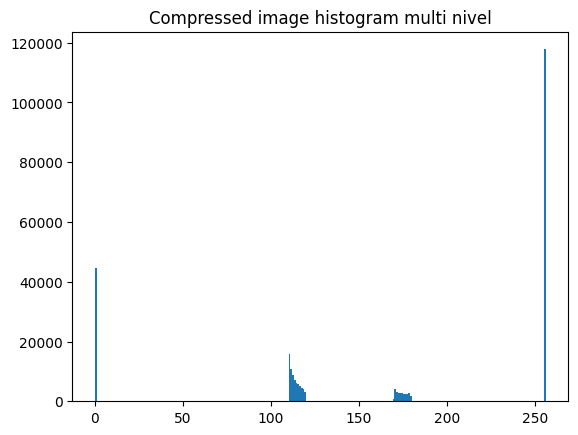

-1

In [5]:
#show the original image histogram
plt.title('Original image histogram')
plt.hist(gray.ravel(),256,[0,256])
plt.show()

#show the scaled image histogram
plt.title('Scaled image histogram multi nivel')
plt.hist(expantion2.ravel(),256,[0,256])
plt.show()

#show the compressed image histogram
plt.title('Compressed image histogram multi nivel')
plt.hist(compresion2.ravel(),256,[0,256])
plt.show()

cv2.waitKey(0)